# Conceptual plots

Plots for the paper that do not use any data.

In [1]:
using Plots

        ## Total travel demand vs. occupancy and flow

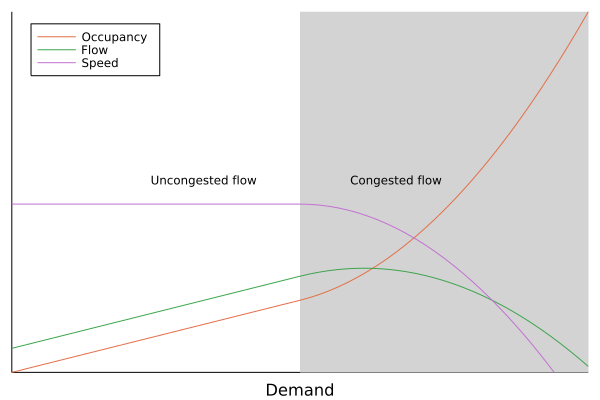

In [3]:
                        function occupancy(demand)
    # linear up to a pointernt
    if demand ≤ 5
        return demand
    else
        # then congested
        # cts in first deriv, dy/dx x^2 is 1 at 0.5
        return 4.75 + (demand - 4.5) ^ 2
    end
end

function flow(demand)
    ϕ = 0.75
    if demand ≤ 5
        return demand + 1
    else
        return 6 - ϕ * (demand - 5 - 1 / (ϕ * 2)) ^ 2 + ϕ * (1 / (ϕ * 2)) ^ 2
    end
end

function speed(demand)
    if demand ≤ 5
        return 9
    else
        return 9 - (demand - 5) ^ 2
    end
end

demand = 2:0.1:8

plot(Shape([5, 25, 25, 5, 5], [-10, -10, 100, 100, -10]), color=:lightgray, line=false, xlim=(2, 8), ylim=(2, 17), label=false)
plot!(demand, occupancy.(demand), label="Occupancy", xticks=false, yticks=false, legend=:topleft, xlabel="Demand")
plot!(demand, flow.(demand), label="Flow", xticks=false, yticks=false)
plot!(demand, speed.(demand), label="Speed", xticks=false, yticks=false)
annotate!(4, 10, text("Uncongested flow", pointsize=8))
annotate!(6, 10, text("Congested flow", pointsize=8))
savefig("../fig/flow_occ_theory.pdf")
savefig("../presentation/flow_occ_theory.png")
plot!()